In [7]:

from typing import List
import mhn

import numpy as np
import pandas as pd
import RandomMHNGenerator as rmg
import ClusterableMhnGenerator as cmg
import EventDistanceMeasurer as edm
import mhn_tools


#sampled_data=cl_generator.getMHN().sample_artificial_data(100000, as_dataframe=True)

loading from mbonart_checkpoints/rmg1/mhn_SET
loading from mbonart_checkpoints/rmg1/mhn_TRAINED


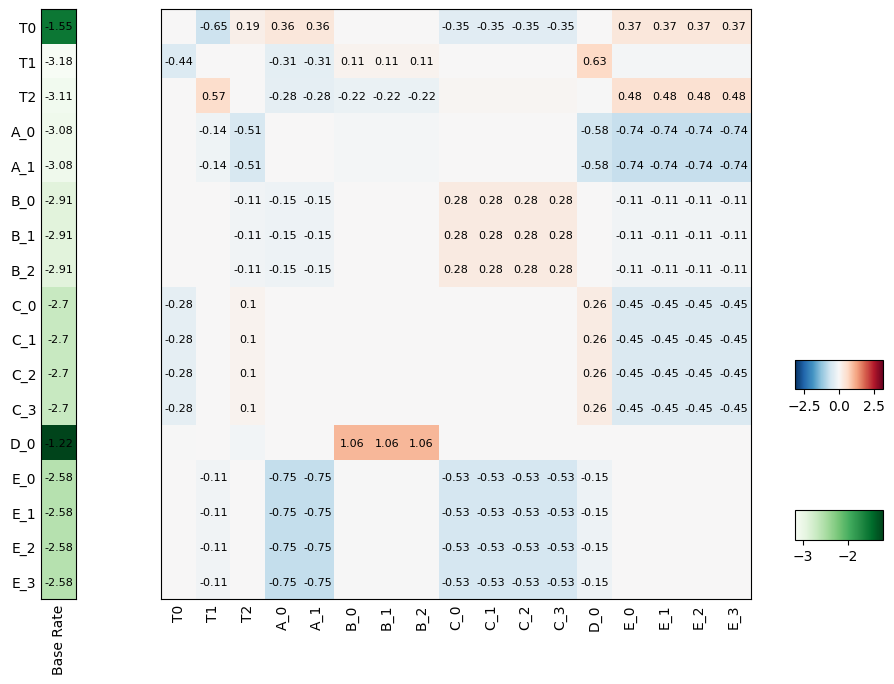

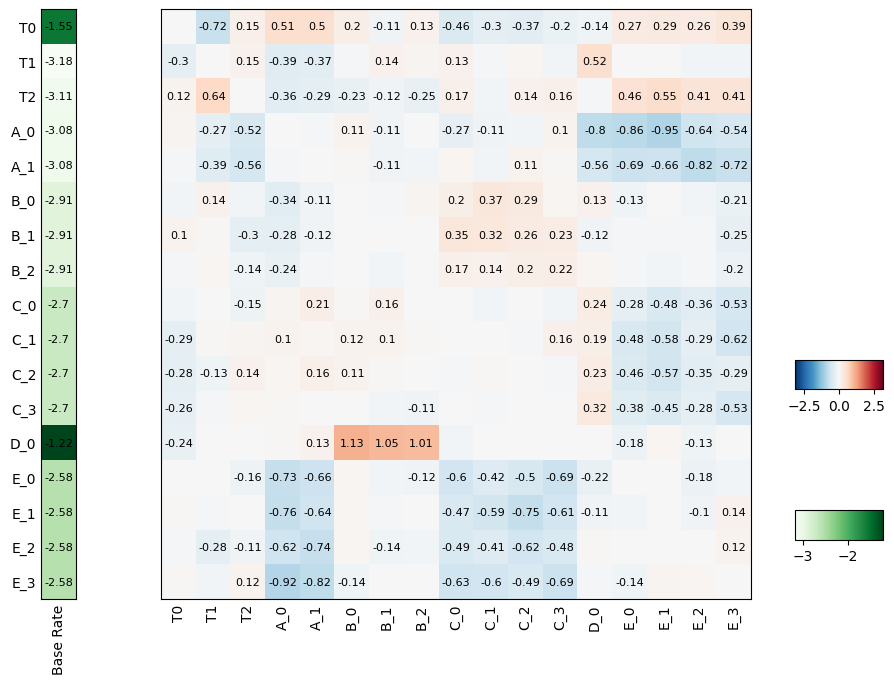

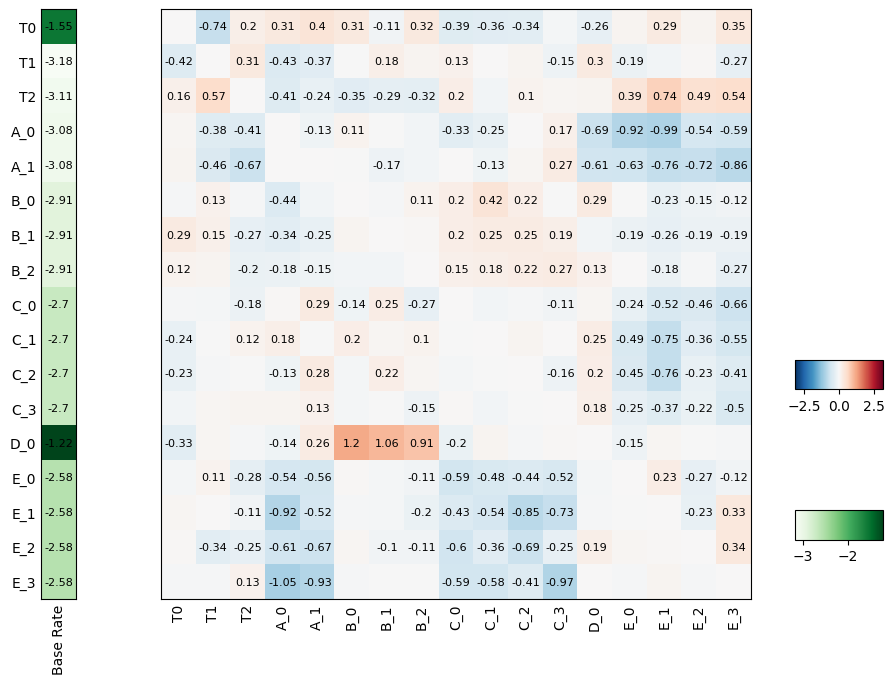

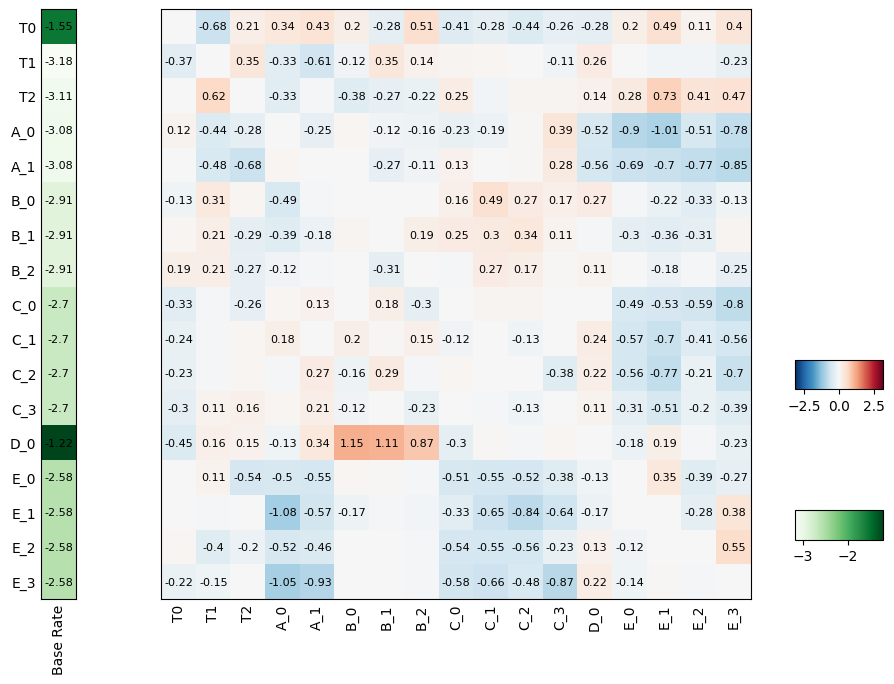

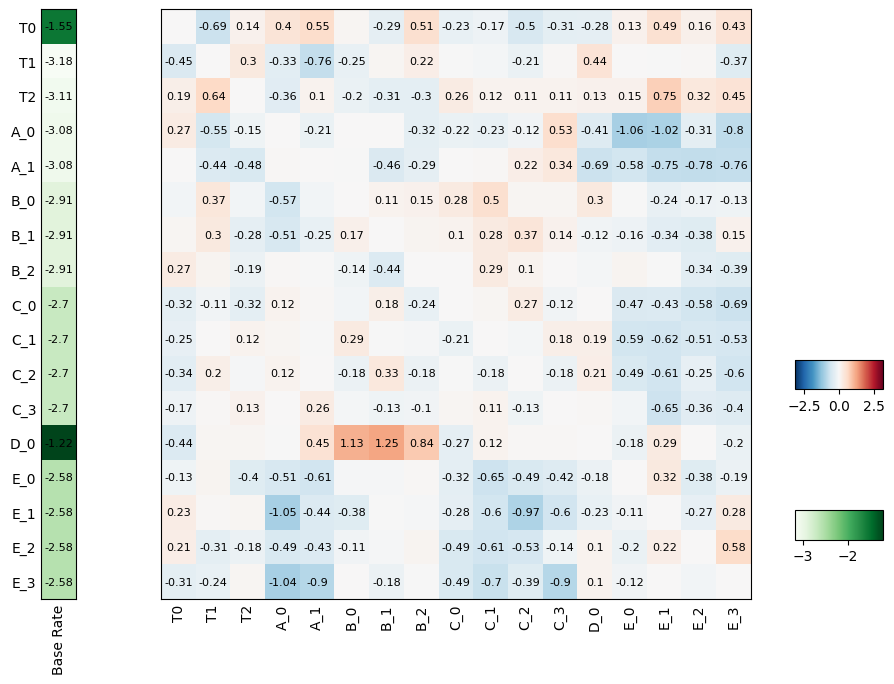

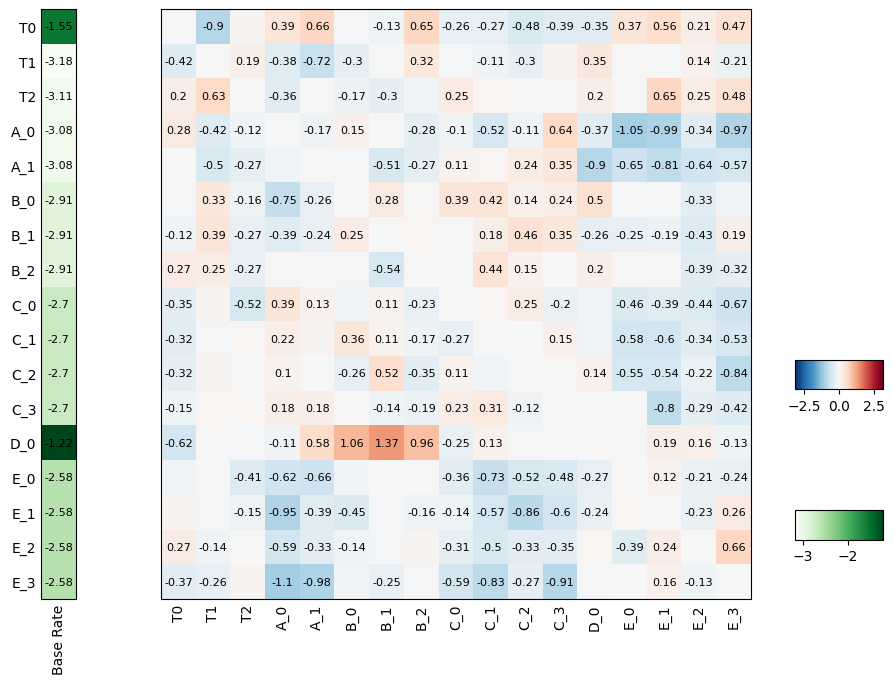

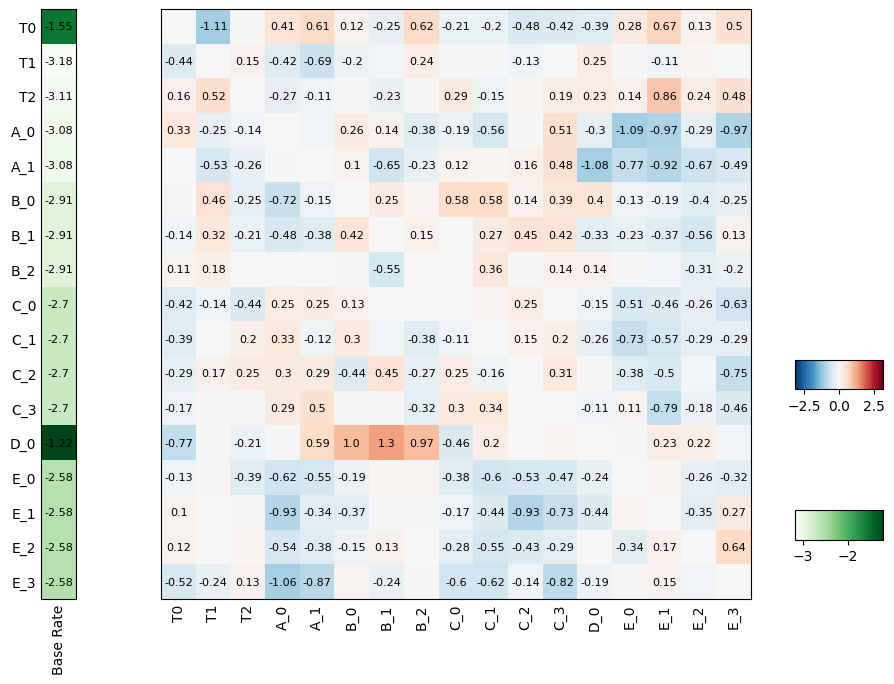

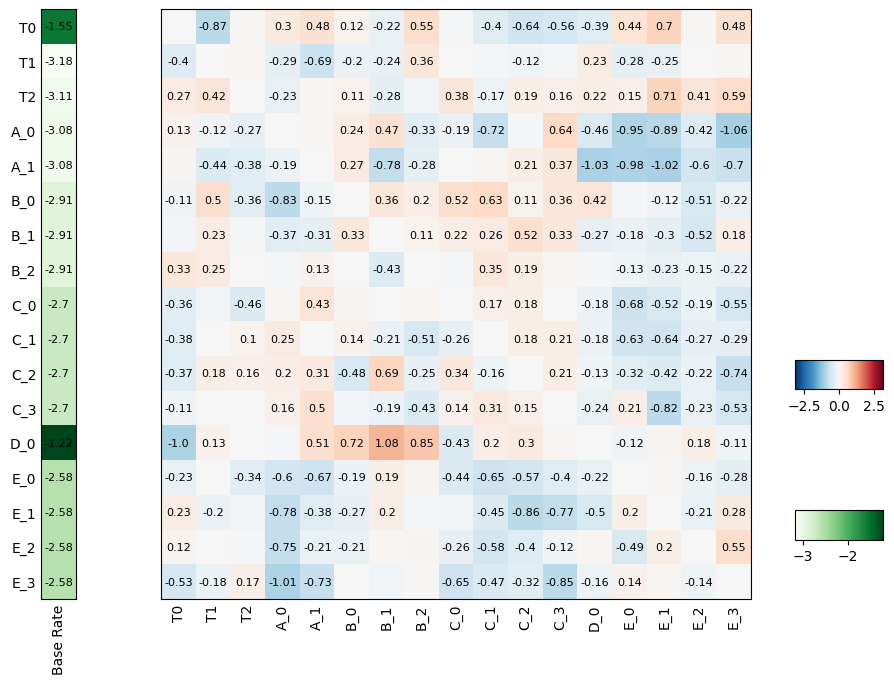

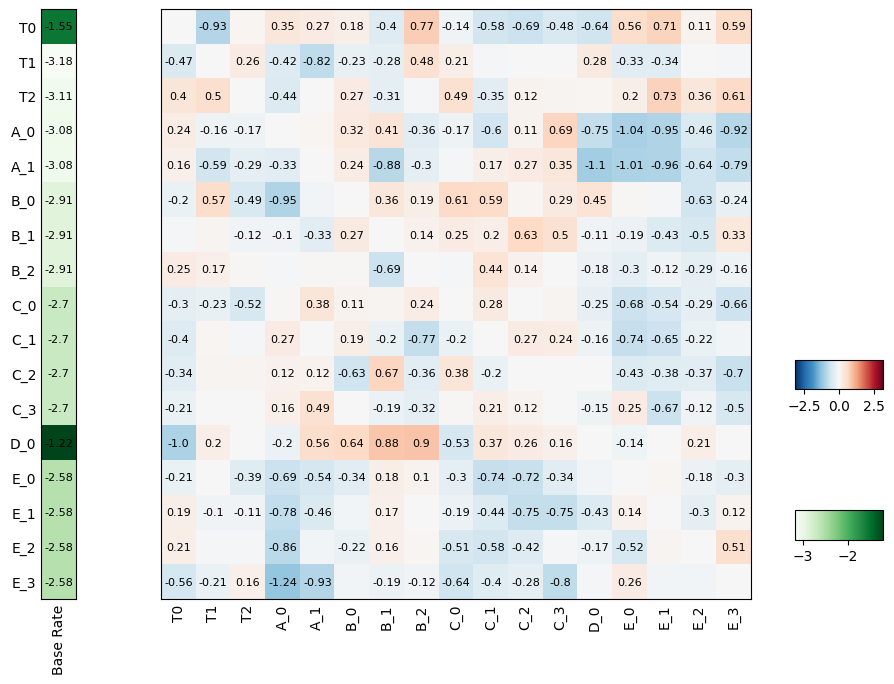

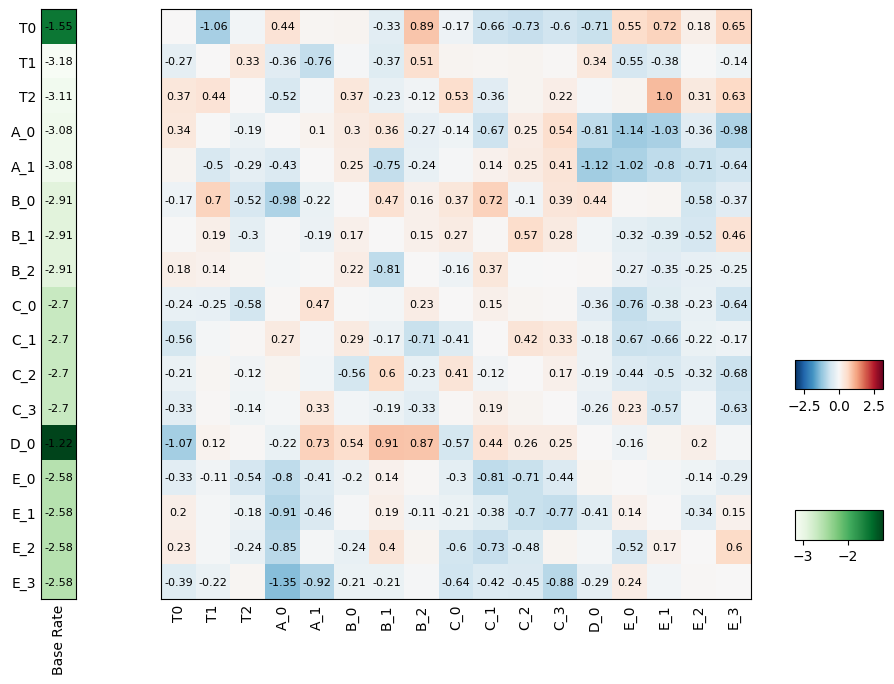

In [8]:
np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.loadfrom("mbonart_checkpoints/rmg1")
cl_generator.setClusterMHN(rand_generator.getMHN())
cl_generator.splitClusters([2,3,4,1,4])

test_events = cl_generator.getEvents(cmg.DOM.TEST)
events = cl_generator.getEvents(cmg.DOM.CLUSTER)

sampled_datas:List[pd.DataFrame]=[]

dist_measurers = []
noisy_mhns: List[mhn.model.cMHN]=[]

noise_steps=10
noise_inc=0.1

for i in range(noise_steps):
    noisy_mhn = mhn_tools.copyMHN(cl_generator.getMHN())
    sampled_data=noisy_mhn.sample_artificial_data(100000, as_dataframe=True)
    noisy_mhns.append(noisy_mhn)
    sampled_datas.append(sampled_data)
    cl_generator.addNoiseOffDiags(noise_inc)

for noisy_mhn in noisy_mhns:
    noisy_mhn.plot()






In [ ]:
for i, sampled_data in enumerate(sampled_datas):
    
    dist_measurer=edm.EventDistanceMeasurerCP(test_events, events)

    dist_measurer.load_data(sampled_data)
    dist_measurer.train_All_MHNs(identifier=f"noise{i*noise_inc}__")
    dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_EUCLID)

    dist_measurers.append(dist_measurer)

0x1.7ccf144b235a1p+61
Directory for storage is edm_noise0.0_7ccf144b235a1
check if mbonart_checkpoints/edm_noise0.0_7ccf144b235a1   does exist


KeyboardInterrupt: 